In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import COLOR_COLUMNS, BAND_CALIB_COLUMNS, BAND_PAIRS, COLOR_PAIRS, process_kids, clean_sdss, describe_column, \
                  cut_u_g, cut_r, number_count_analysis
from utils_plotting import plot_class_histograms

In [3]:
sns.set(style='ticks')

# KIDS magnitudes

In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True, cut='r')

Data shape: (91317, 44)
Droping NANs: 91317 left
Removing flags: 31908 left
Removing errors bigger than 1: 30018 left
Removing limiting magnitudes: 26237 left
Cleaning SDSS: 24021 left
Removing R > 22: 23770 left


In [5]:
catalog = pd.read_csv('catalogs/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-03-16_13:19:31.csv')
catalog.shape

(1784891, 17)

In [6]:
qso_kids_sdss = kids_x_sdss.loc[kids_x_sdss['CLASS'] == 'QSO']
qso_catalog = catalog.loc[catalog['CLASS'] == 'QSO']

In [7]:
catalog_sampled = catalog.sample(n=500000, random_state=1567)
qso_catalog_sampled = qso_catalog.sample(n=100000, random_state=1567)

In [8]:
catalog_north = catalog.loc[catalog['DECJ2000'] > -15]
catalog_south = catalog.loc[catalog['DECJ2000'] < -15]

In [9]:
describe_column(kids_x_sdss['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([12089,  4352,  7329]),
 array([50.85822465, 18.3087926 , 30.83298275]))

In [10]:
describe_column(catalog['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([876031, 188924, 719936]),
 array([49.08036401, 10.58462394, 40.33501205]))

In [11]:
describe_column(catalog_north['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([589471, 121285, 531076]),
 array([47.46785394,  9.766619  , 42.76552706]))

In [12]:
describe_column(catalog_south['CLASS'])

(array(['GALAXY', 'QSO', 'STAR'], dtype=object),
 array([286560,  67639, 188860]),
 array([52.76774715, 12.45518443, 34.77706842]))

## Standalone bands

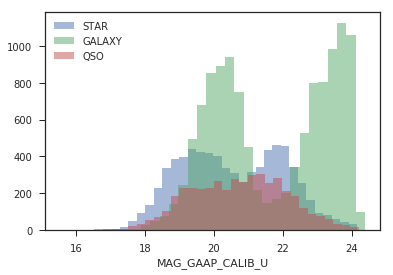

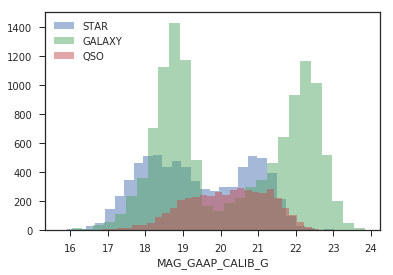

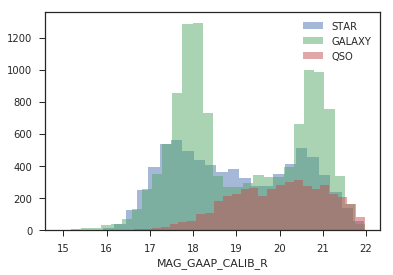

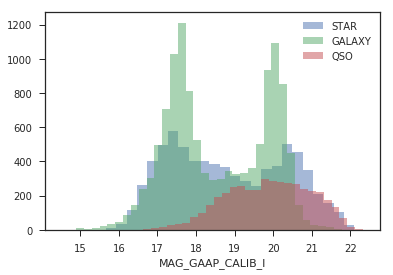

In [13]:
plot_class_histograms(kids_x_sdss, BAND_CALIB_COLUMNS)

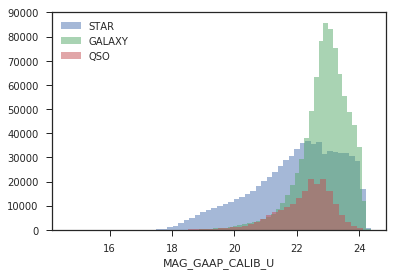

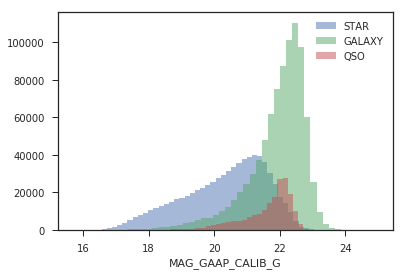

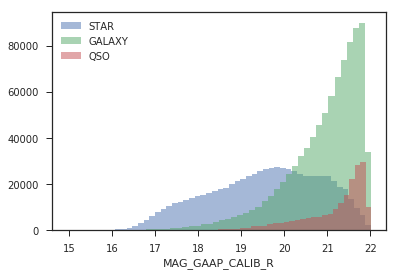

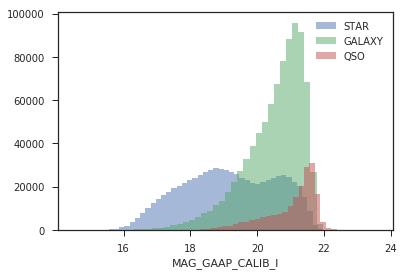

In [15]:
plot_class_histograms(catalog, BAND_CALIB_COLUMNS)

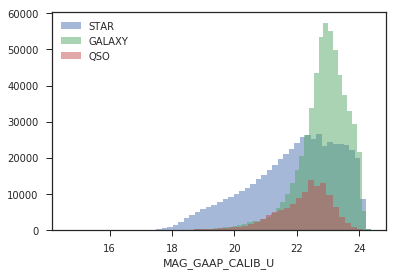

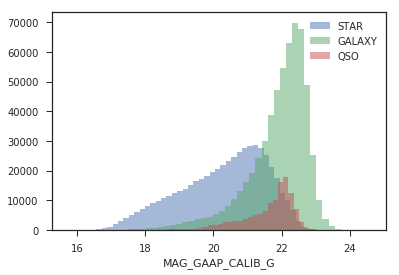

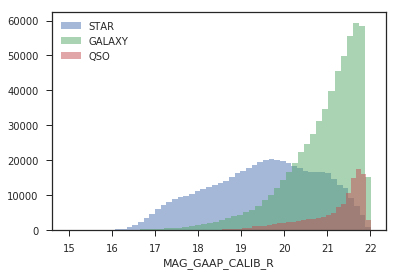

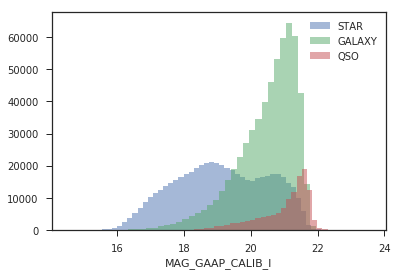

In [16]:
plot_class_histograms(catalog_north, BAND_CALIB_COLUMNS)

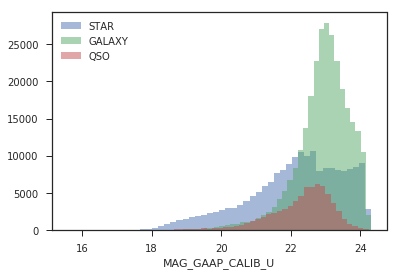

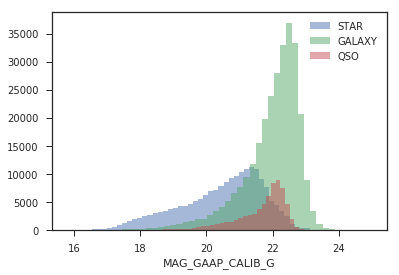

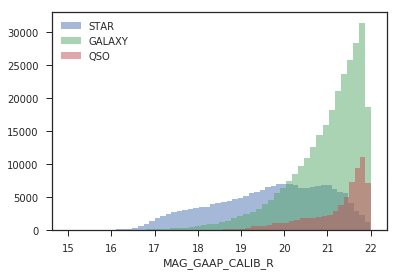

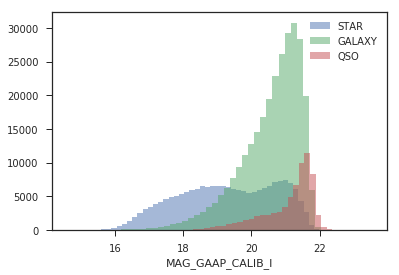

In [17]:
plot_class_histograms(catalog_south, BAND_CALIB_COLUMNS)

## Paired bands

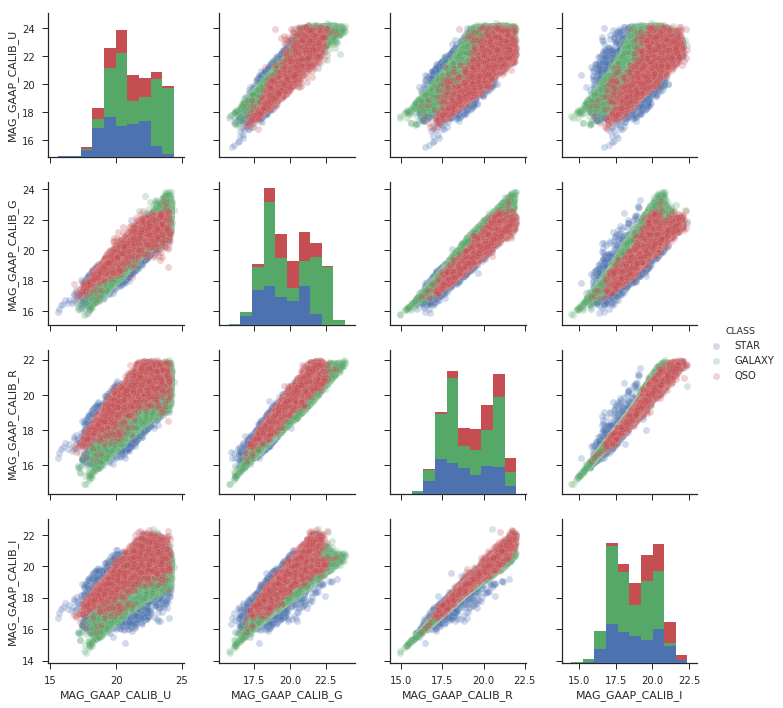

In [13]:
sns.pairplot(kids_x_sdss[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

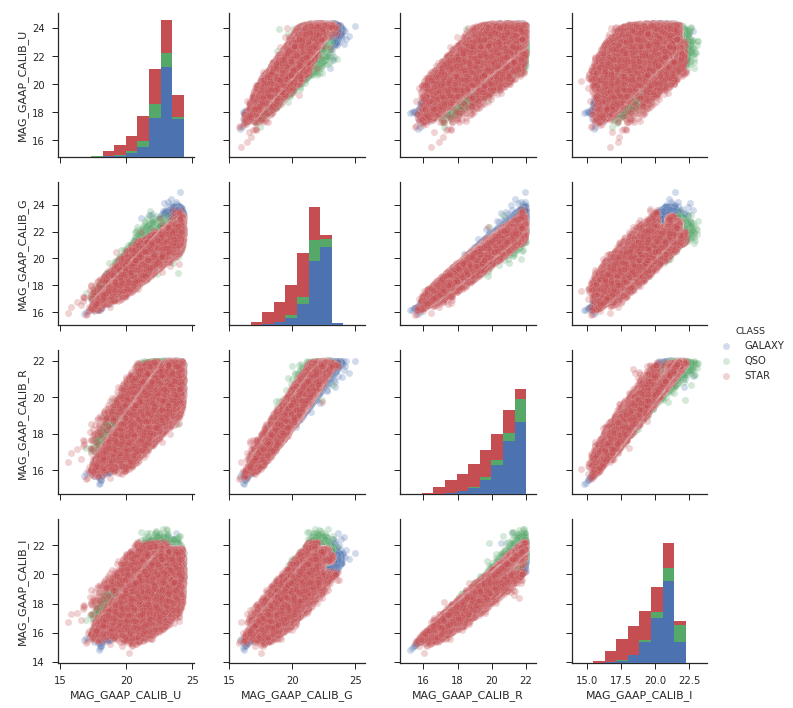

In [14]:
sns.pairplot(kids_catalog_sampled[np.concatenate([BAND_CALIB_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

## Standalone colors

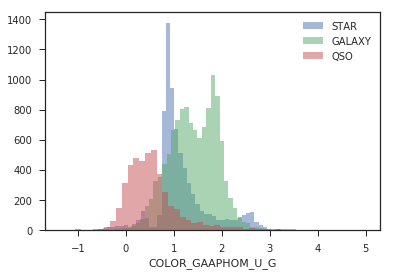

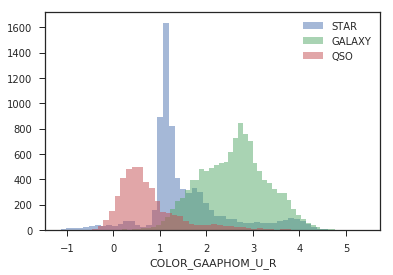

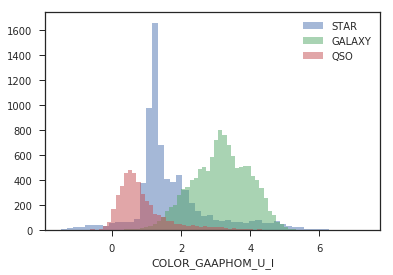

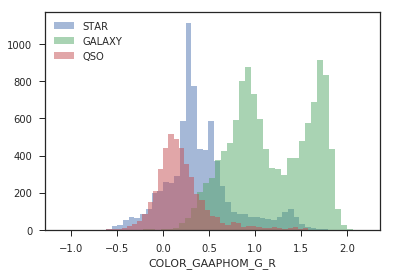

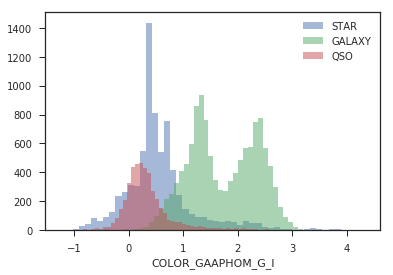

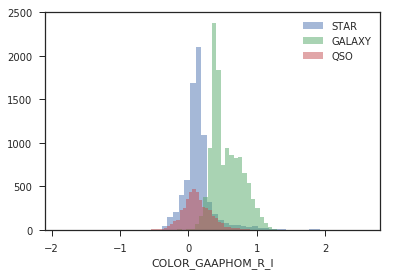

In [15]:
plot_class_histograms(kids_x_sdss, COLOR_COLUMNS)

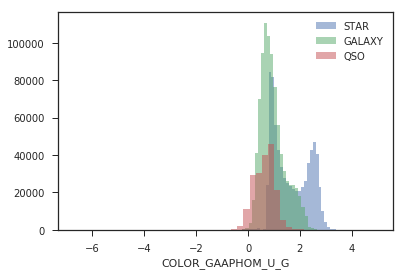

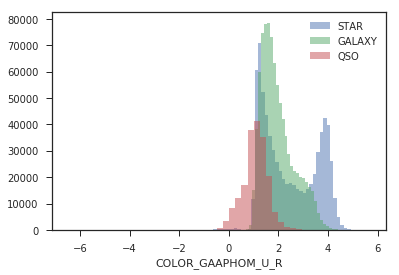

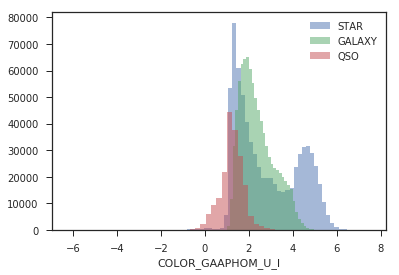

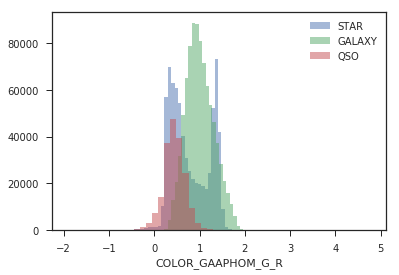

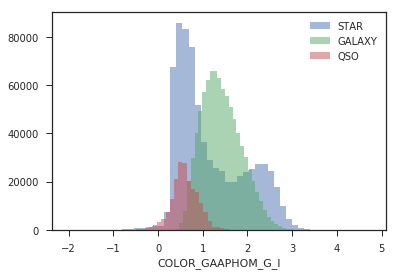

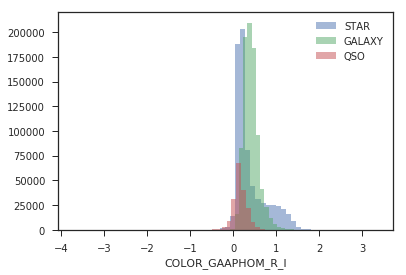

In [16]:
plot_class_histograms(kids_catalog, COLOR_COLUMNS)

## Paired colors

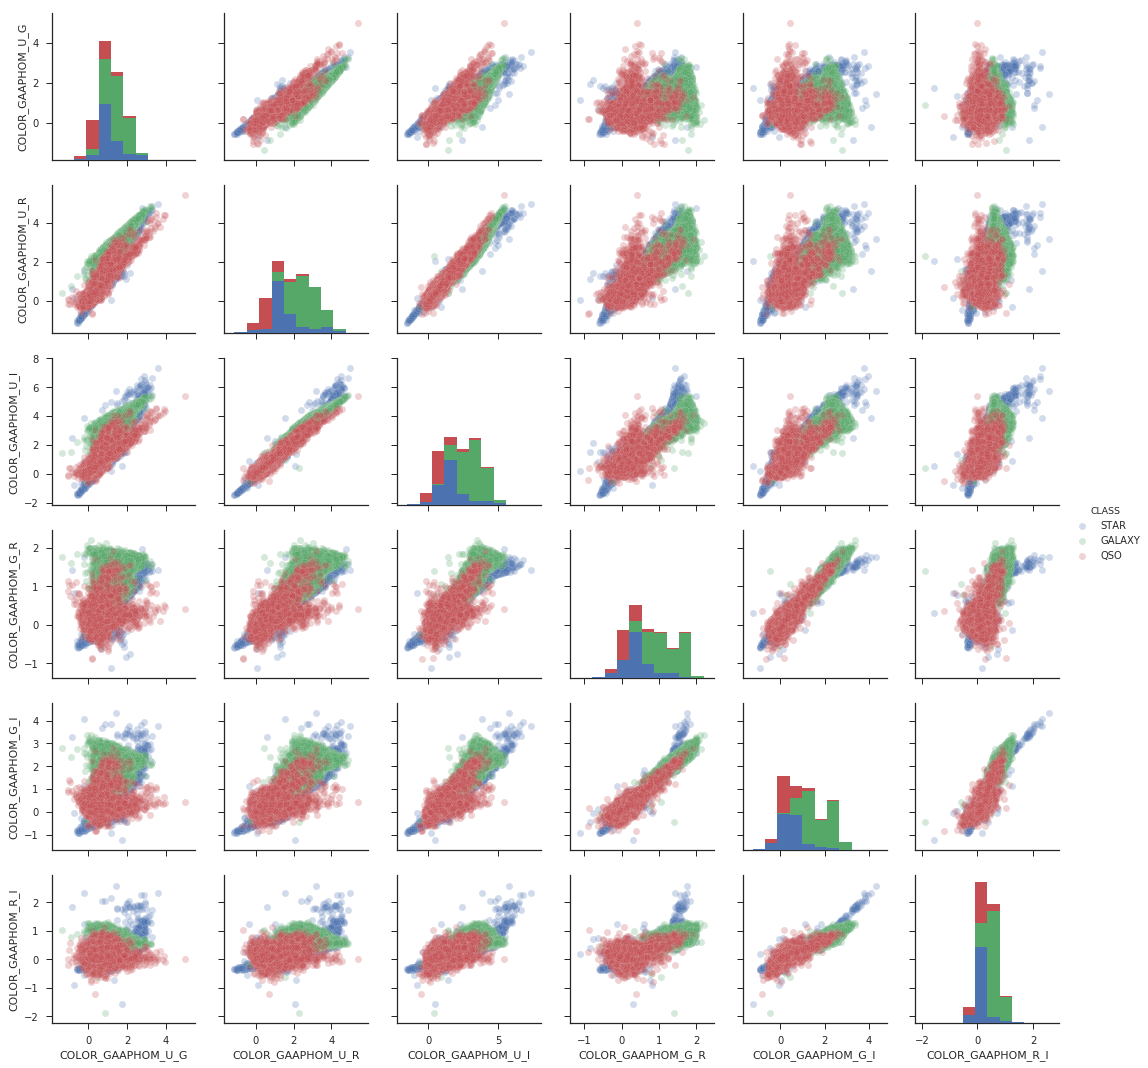

In [17]:
sns.pairplot(kids_x_sdss[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

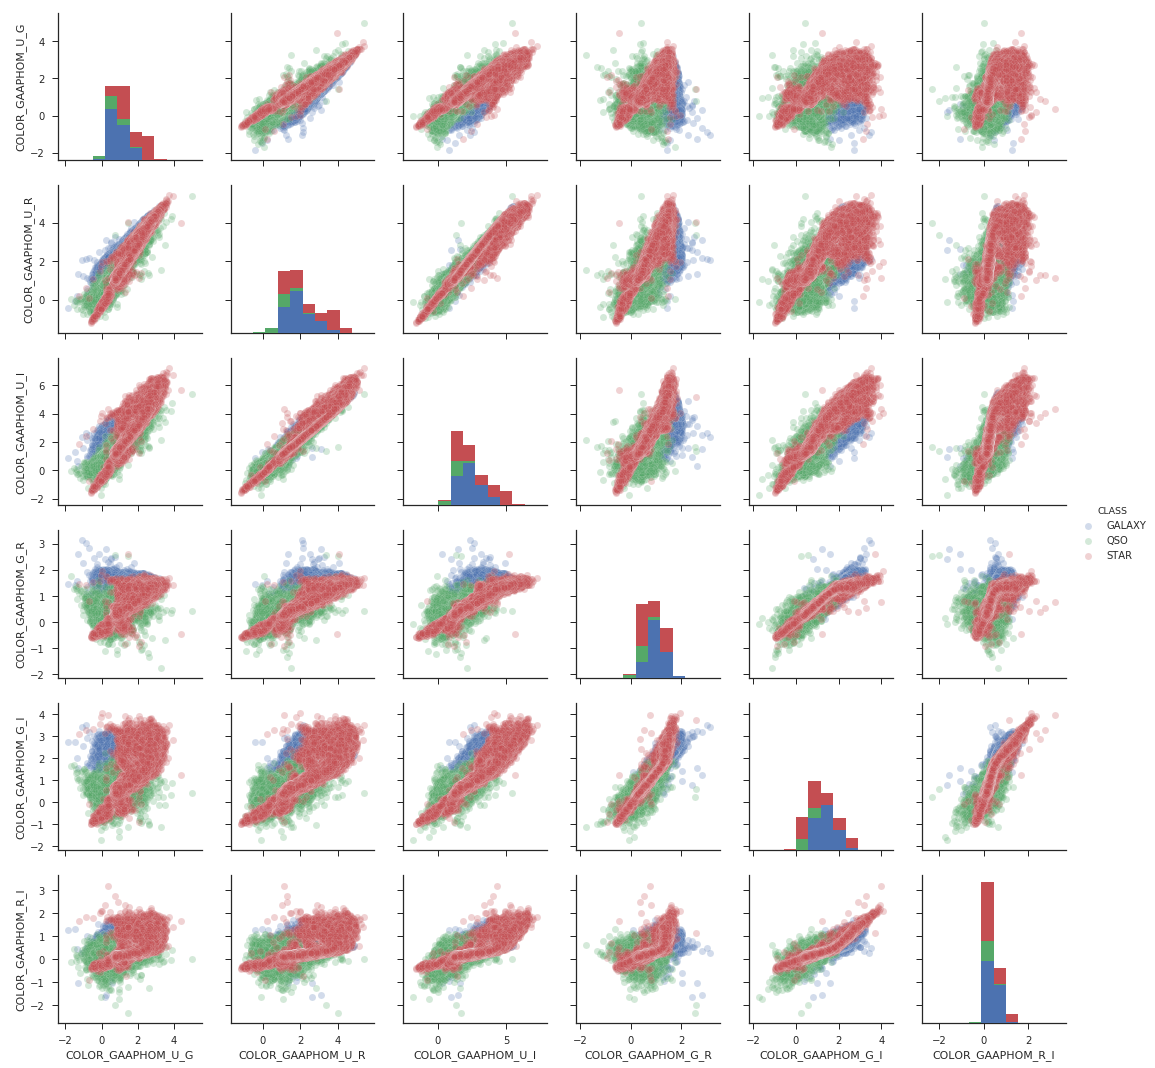

In [18]:
sns.pairplot(kids_catalog_sampled[np.concatenate([COLOR_COLUMNS, ['CLASS']])], hue='CLASS', plot_kws={'alpha': 0.25})

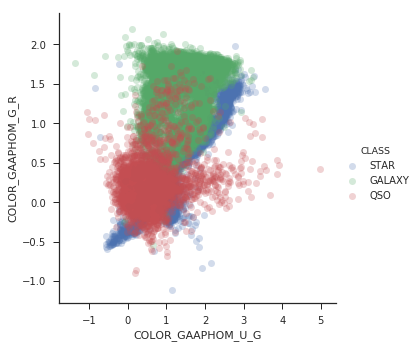

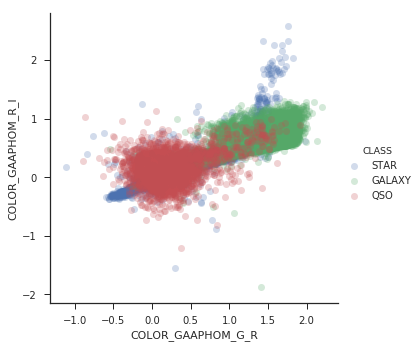

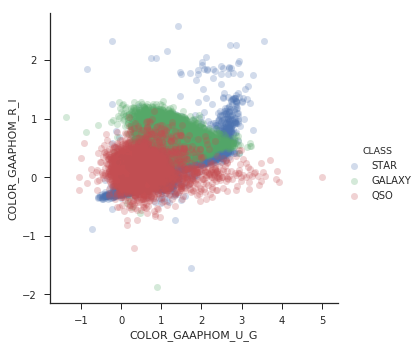

In [11]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=kids_x_sdss, fit_reg=False, scatter_kws={'alpha': 0.25})

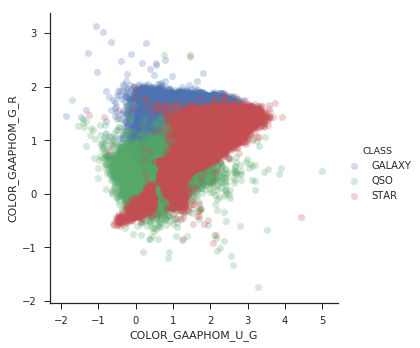

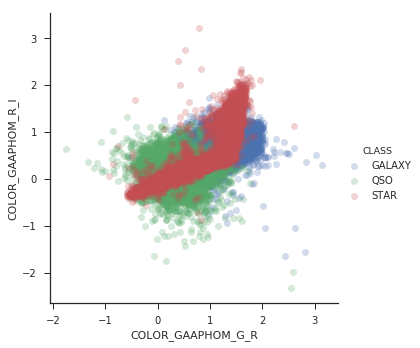

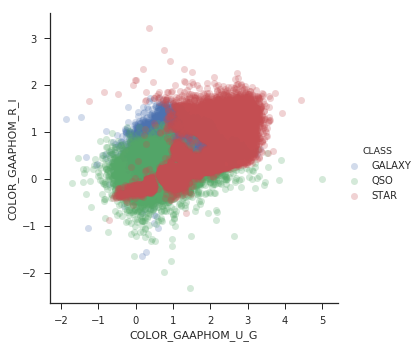

In [16]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.lmplot(x=b_1, y=b_2, hue='CLASS', data=catalog_sampled, fit_reg=False, scatter_kws={'alpha': 0.25})

## QSO color pairs

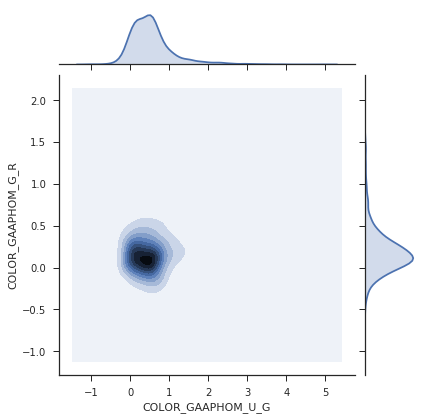

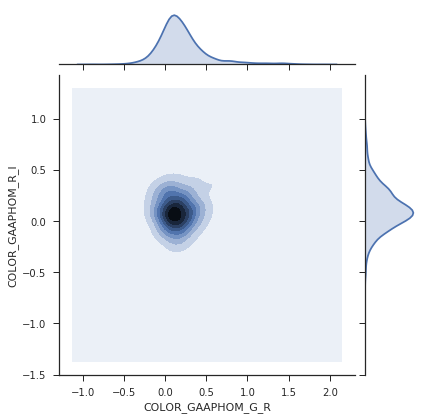

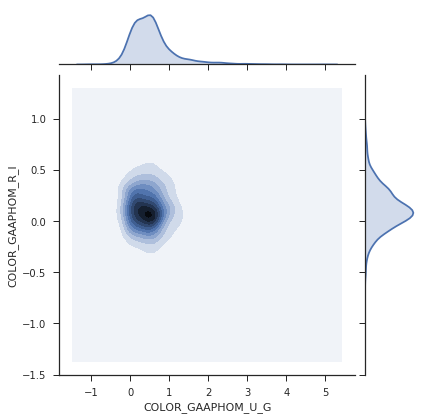

In [12]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_sdss[b_1], qso_kids_sdss[b_2], kind='kde', stat_func=None)

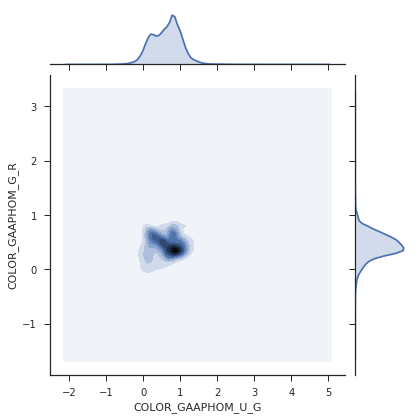

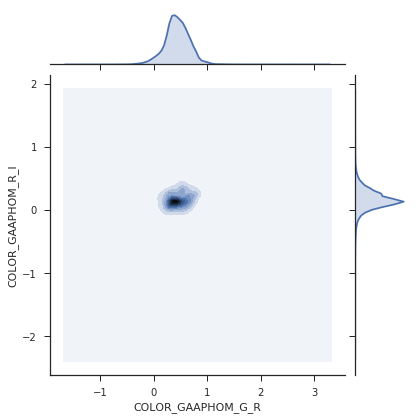

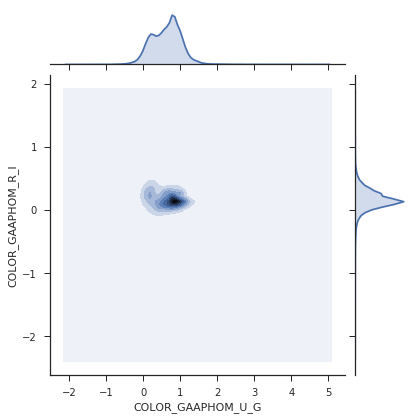

In [13]:
for b_1, b_2 in COLOR_PAIRS:
    sns.set(style='ticks')
    sns.jointplot(qso_kids_catalog_sampled[b_1], qso_kids_catalog_sampled[b_2], kind='kde', stat_func=None)

# Number counts analysis

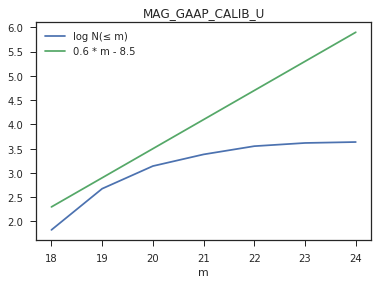

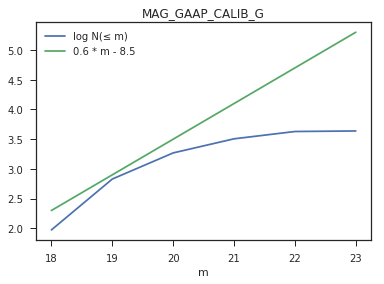

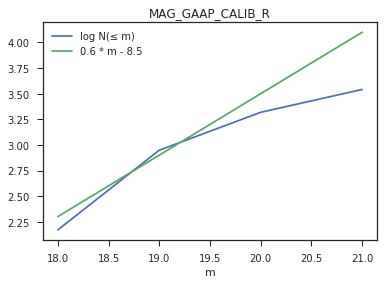

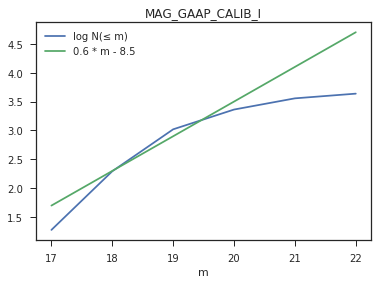

In [23]:
number_count_analysis(qso_kids_sdss, c=8.5)

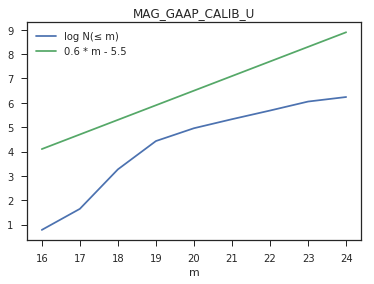

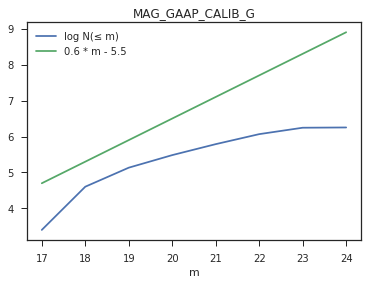

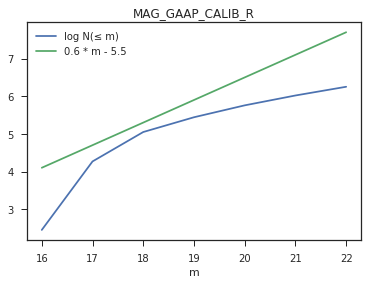

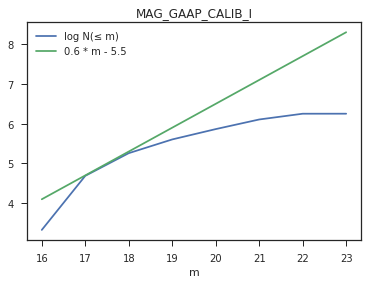

In [21]:
number_count_analysis(catalog, c=5.5)

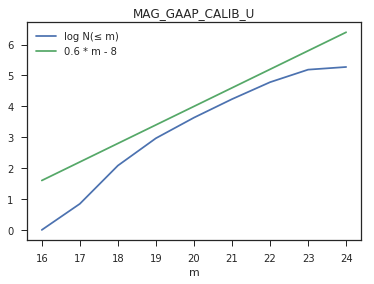

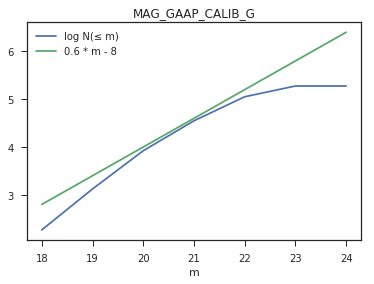

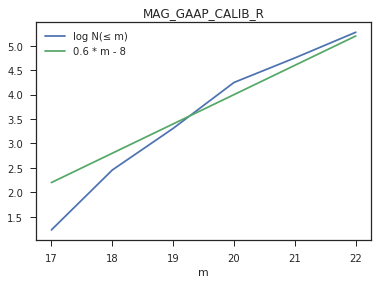

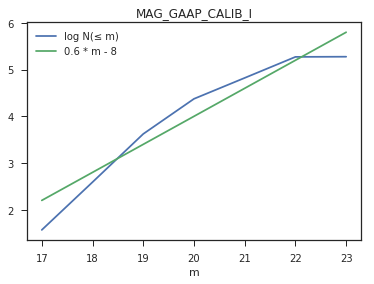

In [72]:
number_count_analysis(qso_catalog, c=8)